In [55]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib as mpl

import stat_tools

from matplotlib_venn import venn2


# Start with all false positives (all tests are truly false)

In [29]:
rng = np.random.default_rng()
n_samples = 1000000
n_genes = 10
x = rng.normal(size=(n_genes, n_samples))
y = rng.normal(size=(n_genes, n_samples))

t, p = sp.stats.ttest_ind(x, y)
print(p.shape)

# Perform multiple hypothesis correction
alpha = 0.1
p_cutoff, ind_pass = stat_tools.Benjamini_Hochberg(p, alpha=alpha)


(1000000,)


Text(0, 0.5, '$pdf(-\\log_{10}p)$')

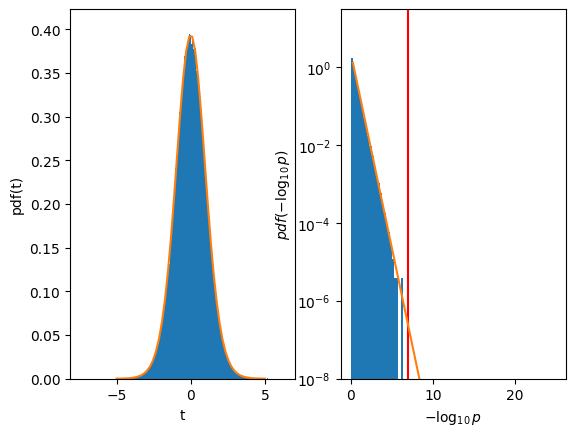

In [30]:


fig, ax = plt.subplots(1, 2)
ax[0].hist(t, bins=1000, density=True)
t_theory = np.linspace(-5, 5)
pdf_t_theory = sp.stats.t(2*n_genes-1).pdf(t_theory)
ax[0].plot(t_theory, pdf_t_theory)
# ax[0].set_yscale('log')

bins = np.linspace(0, 25, 100)
ax[1].hist(-np.log10(p), bins=bins, density=True)
ax[1].axvline(-np.log10(p_cutoff), c='r')

pdf_log10p_theory =  np.log(10)/(10**(bins[1:]))
ax[1].plot(bins[1:], pdf_log10p_theory)
ax[1].set_yscale('log')
ax[1].set_ylim(bottom=1e-8)

ax[0].set_xlabel('t')
ax[0].set_ylabel('pdf(t)')

ax[1].set_xlabel('$-\log_{10}p$')
ax[1].set_ylabel('$pdf(-\log_{10}p)$')



In [31]:
# Nothing passes Bejamini-Hochberg
print(sum(p<0.05) / n_samples)
print(sum(ind_pass) / n_samples)
print(sum(ind_pass))

0.049833
0.0
0


# 5% true positives with substantial significance

In [79]:
rng = np.random.default_rng()
n_samples = 1000000
n_genes = 10
x = rng.normal(size=(n_genes, n_samples))
y = rng.normal(size=(n_genes, n_samples))

index_true_positive = np.zeros(n_samples, dtype=np.bool_)
index_true_positive[:int(n_samples/20)] = True
y[:,index_true_positive] += 10


t, p = sp.stats.ttest_ind(x, y)
print(p.shape)

# Perform multiple hypothesis correction
alpha = 0.1
p_cutoff, ind_pass = stat_tools.Benjamini_Hochberg(p, alpha=alpha)


(1000000,)


Text(0, 0.5, '$pdf(-\\log_{10}p)$')

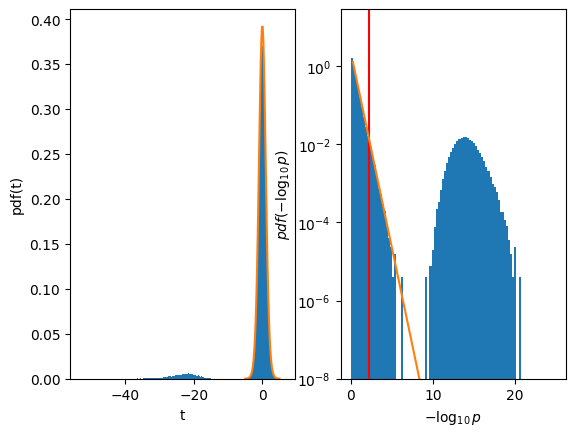

In [80]:


fig, ax = plt.subplots(1, 2)
ax[0].hist(t, bins=1000, density=True)
t_theory = np.linspace(-5, 5)
pdf_t_theory = sp.stats.t(2*n_genes-1).pdf(t_theory)
ax[0].plot(t_theory, pdf_t_theory)
# ax[0].set_yscale('log')

bins = np.linspace(0, 25, 100)
ax[1].hist(-np.log10(p), bins=bins, density=True)
ax[1].axvline(-np.log10(p_cutoff), c='r')

pdf_log10p_theory =  np.log(10)/(10**(bins[1:]))
ax[1].plot(bins[1:], pdf_log10p_theory)
ax[1].set_yscale('log')
ax[1].set_ylim(bottom=1e-8)

ax[0].set_xlabel('t')
ax[0].set_ylabel('pdf(t)')

ax[1].set_xlabel('$-\log_{10}p$')
ax[1].set_ylabel('$pdf(-\log_{10}p)$')



In [81]:
# 11% of samples pass the test.
# Of these, 10% are false positives

print(sum(p<0.05) / n_samples)

print(sum(ind_pass) / n_samples)

print(sum(ind_pass & index_true_positive) / n_samples)

print(sum(ind_pass & ~index_true_positive) / n_samples)

print(sum(ind_pass & ~index_true_positive) / sum(ind_pass))


0.097577
0.055296
0.05
0.005296
0.09577546296296297


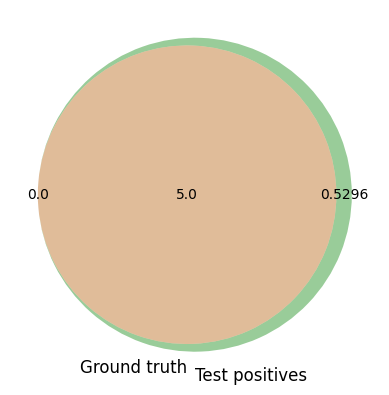

In [82]:
venn2(subsets=(100*sum(index_true_positive & ~ind_pass)/n_samples,
               100*sum(ind_pass & ~index_true_positive)/n_samples,
               100*sum(ind_pass & index_true_positive)/n_samples), set_labels=("Ground truth", "Test positives"))

# 5% true positives with marginal significance

In [83]:
rng = np.random.default_rng()
n_samples = 1000000
n_genes = 10
x = rng.normal(size=(n_genes, n_samples))
y = rng.normal(size=(n_genes, n_samples))

index_true_positive = np.zeros(n_samples, dtype=np.bool_)
index_true_positive[:int(n_samples/10)] = True
y[:,index_true_positive] += 1.2


t, p = sp.stats.ttest_ind(x, y)
print(p.shape)

# Perform multiple hypothesis correction
alpha = 0.1
p_cutoff, ind_pass = stat_tools.Benjamini_Hochberg(p, alpha=alpha)


(1000000,)


Text(0, 0.5, '$pdf(-\\log_{10}p)$')

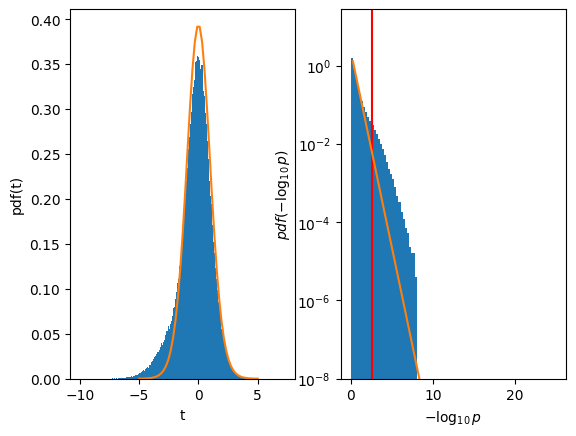

In [84]:


fig, ax = plt.subplots(1, 2)
ax[0].hist(t, bins=1000, density=True)
t_theory = np.linspace(-5, 5)
pdf_t_theory = sp.stats.t(2*n_genes-1).pdf(t_theory)
ax[0].plot(t_theory, pdf_t_theory)
# ax[0].set_yscale('log')

bins = np.linspace(0, 25, 100)
ax[1].hist(-np.log10(p), bins=bins, density=True)
ax[1].axvline(-np.log10(p_cutoff), c='r')

pdf_log10p_theory =  np.log(10)/(10**(bins[1:]))
ax[1].plot(bins[1:], pdf_log10p_theory)
ax[1].set_yscale('log')
ax[1].set_ylim(bottom=1e-8)

ax[0].set_xlabel('t')
ax[0].set_ylabel('pdf(t)')

ax[1].set_xlabel('$-\log_{10}p$')
ax[1].set_ylabel('$pdf(-\log_{10}p)$')



In [85]:
# 3% of samples pass the test.
# Of these, nearly 10% are false positives

print(sum(p<0.05) / n_samples)

print(sum(ind_pass) / n_samples)

print(sum(ind_pass & index_true_positive) / n_samples)

print(sum(ind_pass & ~index_true_positive) / n_samples)

print(sum(ind_pass & ~index_true_positive) / sum(ind_pass))


0.117317
0.029641
0.027021
0.00262
0.08839107992307951


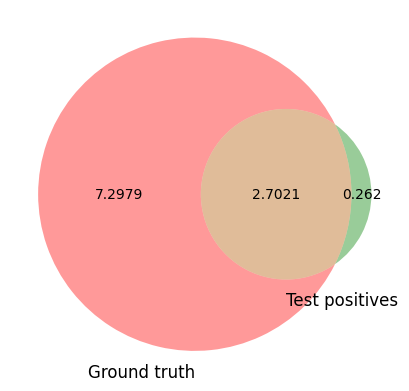

In [86]:
venn2(subsets=(100*sum(index_true_positive & ~ind_pass)/n_samples,
               100*sum(ind_pass & ~index_true_positive)/n_samples,
               100*sum(ind_pass & index_true_positive)/n_samples), set_labels=("Ground truth", "Test positives"))